In [22]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [23]:
!ls

clase			     javierimage.png		  sample_data
drive			     javierimage_rota_escala.png  uao_1.jpeg
geometricas1.png	     javierimage_rota.png	  uao_2.jpeg
geometricas.png		     javierimage_total.png	  uao_2rot.jpeg
javierimage_escala.png	     kaggle.json
javierimage_perspectiva.png  noisy.jpg


In [24]:
!mkdir -p /content/drive/MyDrive/CVwDL_20231/Clase1

In [25]:
!cp /content/{noisy.jpg}/ /content/drive/MyDrive/CVwDL_20231/Clase1

cp: cannot stat '/content/{noisy.jpg}/': No such file or directory


In [26]:
!mkdir /content/clase/

mkdir: cannot create directory ‘/content/clase/’: File exists


In [27]:
!unzip javier.zip -d /content/clase/

unzip:  cannot find or open javier.zip, javier.zip.zip or javier.zip.ZIP.


In [28]:
import os 
for filename in os.listdir('/content/clase'):
  noimg = filename[:-4]
  print(noimg)

In [29]:
import matplotlib.pyplot as plt
import glob
from IPython.display import Image

In [30]:
imagenes = []

for f in glob.iglob('/content/clase/*.png'):
  imagenes.append(plt.imread(f))

In [31]:
plt.figure(figsize=(10,10))
for i, imagene in enumerate(imagenes):
  plt.subplot(3,2, i+1)
  plt.imshow(imagene)

<Figure size 720x720 with 0 Axes>

In [32]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [33]:
imagen = cv2.imread('/content/noisy.jpg')
imagen_gris = cv2.cvtColor(imagen , cv2.COLOR_BGR2GRAY)

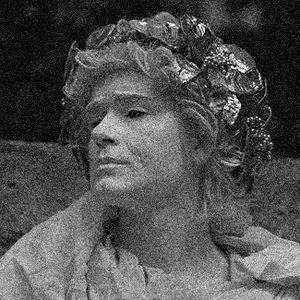

In [34]:
cv2_imshow(imagen_gris)

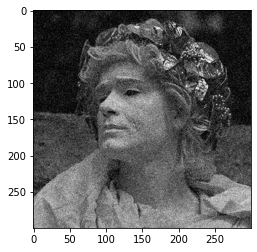

In [35]:
plt.imshow(imagen_gris, cmap='gray')

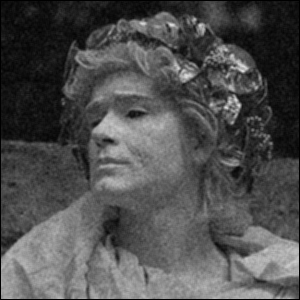

In [36]:
blur = np.array([[1,1,1],[1,1,1],[1,1,1]])
k = blur.shape[0]
cons = int((k-1)/2)
img_blur = np.zeros(shape = imagen_gris.shape)

for i in range(1,imagen_gris.shape[0]-cons):
  for j in range(1,imagen_gris.shape[1]-cons):
    mat = imagen_gris[i-1:i+k-1,j-1:j+k-1]
    img_blur[i,j] = np.sum(np.multiply(mat,blur))/9

cv2_imshow(img_blur)

In [37]:
sobelX = cv2.Sobel(imagen_gris,cv2.CV_64F,1,0, ksize = 3)
sobelY = cv2.Sobel(imagen_gris,cv2.CV_64F,0,1, ksize = 3)

In [38]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


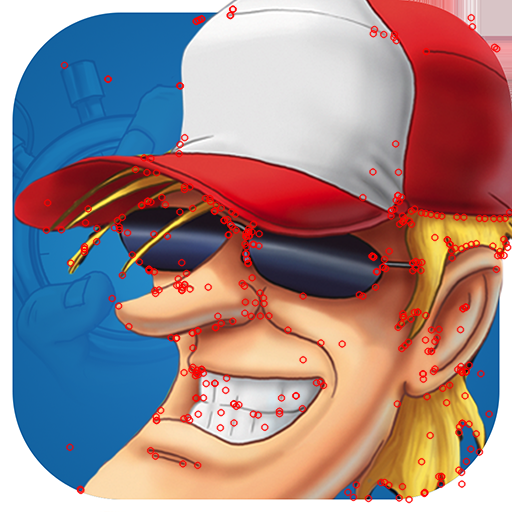

In [39]:
img = cv2.imread('/content/javierimage.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(img_gray,None)

output = cv2.drawKeypoints(img,kp,0, (0, 0, 255),flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(output)

76


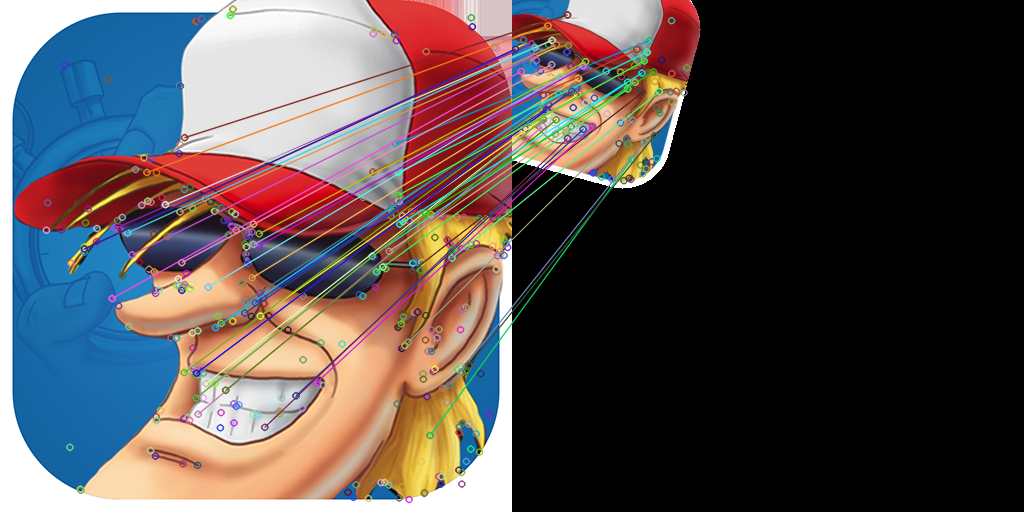

In [40]:
img2 = cv2.imread('/content/javierimage_rota_escala.png')
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp1,desc1 = sift.detectAndCompute(img_gray,None)
kp2,desc2 = sift.detectAndCompute(img_gray2,None)

fbm = cv2.BFMatcher(cv2.NORM_L2,crossCheck=True)
matches = fbm.match(desc1,desc2)
matches = sorted(matches,key=lambda x:x.distance)
print(len(matches))
result = cv2.drawMatches(img,kp1,img2,kp2,matches[:50],None)
cv2_imshow(result)

132


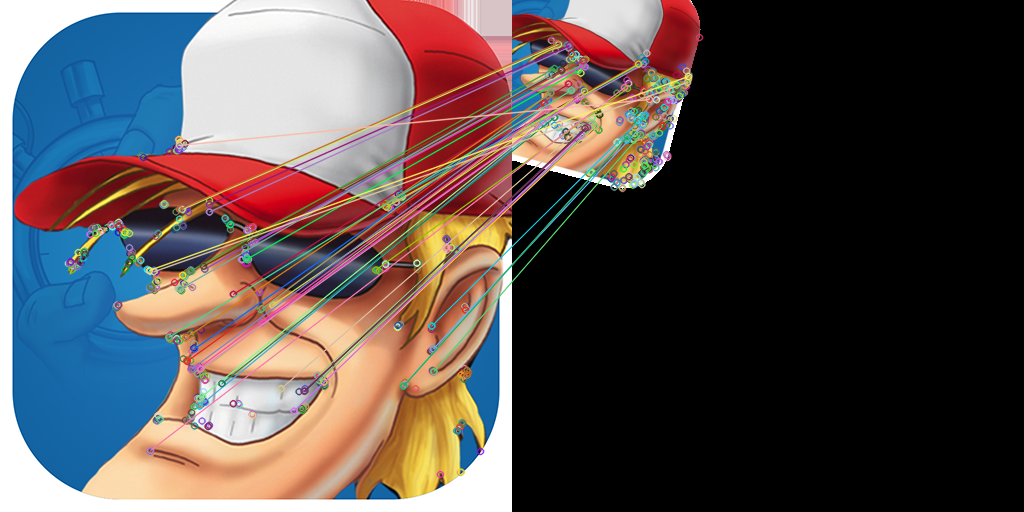

In [41]:
img2 = cv2.imread('/content/javierimage_rota_escala.png')
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
kp1,desc1 = orb.detectAndCompute(img_gray,None)
kp2,desc2 = orb.detectAndCompute(img_gray2,None)

fbm = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches = fbm.match(desc1,desc2)
matches = sorted(matches,key=lambda x:x.distance)
print(len(matches))
result = cv2.drawMatches(img,kp1,img2,kp2,matches[:50],None)
cv2_imshow(result)

In [42]:
img1 = cv2.imread('/content/uao_1.jpeg')
img2 = cv2.imread('/content/uao_2rot.jpeg')

img_gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [43]:
orb = cv2.ORB_create()
kp1,desc1 = orb.detectAndCompute(img_gray1,None)
kp2,desc2 = orb.detectAndCompute(img_gray2,None)

36


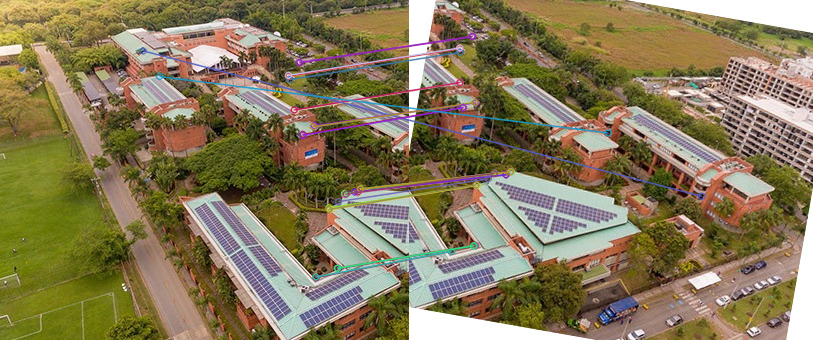

In [44]:
from sys import flags
fbm = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = fbm.knnMatch(desc1,desc2,k=2)
matchesgood = []
matchesgood_nolist = []

for m,n in matches:
  if m.distance < 0.75*n.distance:
    matchesgood.append([m])
    matchesgood_nolist.append(m)

print(len(matchesgood))
resultado = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matchesgood,None,flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(resultado)

In [45]:
MIN_MATCH_COUNT = 10
if len(matchesgood)>MIN_MATCH_COUNT:
  src_pts = np.float32([kp1[m.queryIdx].pt for m in matchesgood_nolist]).reshape(-1,1,2)
  dst_pts = np.float32([kp2[m.trainIdx].pt for m in matchesgood_nolist]).reshape(-1,1,2)

H,status = cv2.findHomography(dst_pts,src_pts,cv2.RANSAC,0.5)
print(H)

width = img_gray2.shape[1] + img_gray1.shape[1]
height = img_gray2.shape[0] + img_gray1.shape[0]

result = cv2.warpPerspective(img2,H,(width,height))
result[0:img1.shape[0],0:img1.shape[1]]= img1

[[ 8.84923743e-01  1.84516846e-01  2.30986921e+02]
 [-2.25975962e-01  9.85167470e-01  3.86674114e+01]
 [-2.75096050e-04  3.19515687e-05  1.00000000e+00]]


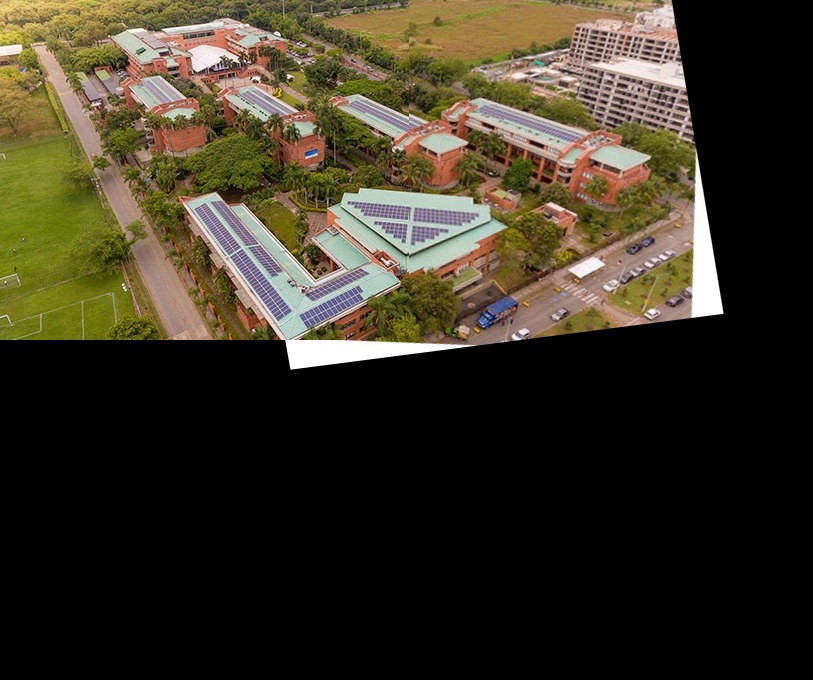

In [46]:
cv2_imshow(result)

In [47]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!chmod 600 kaggle.json

In [49]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [50]:
!cp kaggle.json ~/.kaggle/

In [51]:
!kaggle datasets download ritesh2000/car-brand-images-dataset

  0% 0.00/1.06M [00:00<?, ?B/s]
100% 1.06M/1.06M [00:00<00:00, 77.7MB/s]


In [52]:
!unzip /content/car-brand-images-dataset.zip

Archive:  /content/car-brand-images-dataset.zip
  inflating: Test/audi/21.jpg        
  inflating: Test/audi/22.jpg        
  inflating: Test/audi/23.jpg        
  inflating: Test/audi/24.jpg        
  inflating: Test/audi/25.jpg        
  inflating: Test/audi/26.jpg        
  inflating: Test/audi/27.jpg        
  inflating: Test/audi/28.jpg        
  inflating: Test/audi/29.jpg        
  inflating: Test/lamborghini/1.jpg  
  inflating: Test/lamborghini/10.jpg  
  inflating: Test/lamborghini/11.jpg  
  inflating: Test/lamborghini/12.jpg  
  inflating: Test/lamborghini/13.jpg  
  inflating: Test/lamborghini/14.jpg  
  inflating: Test/lamborghini/15.jpg  
  inflating: Test/lamborghini/16.jpg  
  inflating: Test/lamborghini/17.jpg  
  inflating: Test/lamborghini/18.jpg  
  inflating: Test/lamborghini/19.jpg  
  inflating: Test/lamborghini/2.jpg  
  inflating: Test/lamborghini/20.jog.jpg  
  inflating: Test/lamborghini/21.jpg  
  inflating: Test/lamborghini/22.jpg  
  inflating: Test/lambo

In [53]:
import os

In [54]:
etiquetas = os.listdir('Train')
print(etiquetas)

['mercedes', 'lamborghini', 'audi']


In [55]:
from tqdm.auto import tqdm

In [56]:
imagenes = []
labels = []

for categorias in etiquetas:
  print("Leyendo categoria: ", categorias)
  class_num = etiquetas.index(categorias)
  ruta = os.path.join('Train',categorias)
  print(ruta)
  for img in tqdm(os.listdir(ruta)):
    img_array = cv2.imread(os.path.join(ruta,img),cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(64,64))
    imagenes.append(new_array)
    labels.append(class_num)

Leyendo categoria:  mercedes
Train/mercedes


  0%|          | 0/25 [00:00<?, ?it/s]

Leyendo categoria:  lamborghini
Train/lamborghini


  0%|          | 0/19 [00:00<?, ?it/s]

Leyendo categoria:  audi
Train/audi


  0%|          | 0/20 [00:00<?, ?it/s]

In [57]:
x_train = np.array(imagenes)
y_train = np.array(labels)

<function matplotlib.pyplot.show(close=None, block=None)>

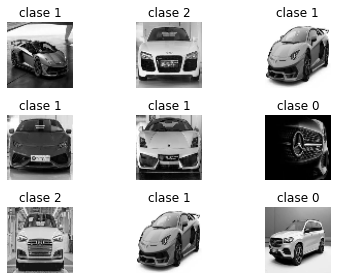

In [58]:
import random

fig, ax = plt.subplots(3,3)
[axi.set_axis_off() for axi in ax.ravel()]
ax = ax.flatten()
for i in ax:
  num =random.randint(0,len(x_train))
  i.imshow(x_train[num],cmap='gray')
  i.set_title("clase {}".format(y_train[num]))

plt.tight_layout()
plt.show

In [59]:
def cargar_imagen(folder):
  for foldername in os.listdir(folder):
    categoria=[]
    ruta = folder + '/' + foldername 
    for filename in os.listdir(ruta):
      img = cv2.imread(ruta + '/' + filename, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        categoria.append(img)
    imagenes[foldername] = categoria
  return imagenes

In [60]:
imagenes = {}
train = cargar_imagen('Train')

In [61]:
def sift_feat(imagenes):
  sift = cv2.SIFT_create()
  sift_featXcat = {}
  sift_feat_all = []
  for key, value in imagenes.items():
    featXcat = []
    for img in value:
      kp,desc = sift.detectAndCompute(img, None)
      sift_feat_all.extend(desc)
      featXcat.append(desc)
    sift_featXcat[key] = featXcat
  return [sift_feat_all, sift_featXcat]

In [62]:
sifts = sift_feat(train)

In [63]:
feat_all = sifts[0]
train_bovw_feat = sifts[1] 

In [64]:
from sklearn.cluster import KMeans

In [65]:
def kmeans(k,lista):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(lista)
  visual_words = kmeans.cluster_centers_
  return visual_words


In [66]:
k = 50
visual_words = kmeans(k,feat_all)

In [67]:
print(visual_words.shape)

(50, 128)


In [68]:
from scipy.spatial import distance

In [69]:
def find_idx(feat,center):
  count=0
  ind=0
  for i in range(len(center)):
    if(i==0):
      count = distance.euclidean(feat,center[i])
    else:
      dist = distance.euclidean(feat,center[i])
      if (dist<count):
        ind = i
        count = dist
    return ind
  

In [70]:
def img_clases(bovw_feat,centers):
  dict_feat = {}
  for key, value in bovw_feat.items():
    imagens = []
    for img in value:
      histo = np.zeros(len(centers))
      for each_feat in img:
        idx = find_idx(each_feat,centers)
        histo[idx] += 1
      imagens.append(histo)
    dict_feat[key] = imagens
  return dict_feat


In [71]:
bovw_train = img_clases(train_bovw_feat, visual_words)

In [72]:
def preparar_datos(diccio):
  y=[]
  x=[]
  for key, values in diccio.items():
    for histo in values:
      x.append(histo)
      y.append(key)
  return np.array(x), np.array(y)


In [73]:
x_train, y_train = preparar_datos(bovw_train)

In [74]:
print(x_train.shape)
print(y_train.shape)

(64, 50)
(64,)


In [75]:
iamgenes = {}
test = cargar_imagen('Test')  

In [76]:
test_bovw_feat = sift_feat(test)[1]

In [77]:
bovw_test = img_clases(test_bovw_feat,visual_words)

In [78]:
x_test, y_test = preparar_datos(bovw_test)

In [79]:
print(x_test.shape)
print(y_test.shape)

(58, 50)
(58,)


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
std = StandardScaler().fit(x_train)
x_train = std.transform(x_train)

In [82]:
x_test = std.transform(x_test)

In [83]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(80,5), activation='relu', solver='adam', max_iter=500 )
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(80, 5), max_iter=500)

In [85]:
p = mlp.predict(x_test)

In [86]:
acc = accuracy_score(y_test,p)
print(str(acc))

0.3448275862068966


In [87]:
cm = confusion_matrix(y_test,p, labels=mlp.classes_)

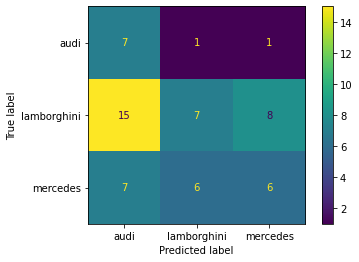

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()